In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar


file_path = "Electric_Consumption_And_Cost__2010_-_Feb_2025__20250512.csv"
df = pd.read_csv(file_path)

df['Revenue Month'] = pd.to_datetime(df['Revenue Month'], errors='coerce')
df_cleaned = df.dropna(subset=['Revenue Month', 'Borough', 'Consumption (KWH)'])

# Remove unwante Data
unwanted_boroughs = ['FHA', 'NON DEVELOPMENT FACILITY', 'NYCHA CENTRAL OFFICE']

#Keep only relevant columns
df_cleaned = df_cleaned[~df_cleaned['Borough'].isin(unwanted_boroughs)]


/var/folders/b5/rq3jfylx1cs5ystwv491hgf40000gn/T/ipykernel_88701/11258456.py:8: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Has the seasonal Pattern changed over the years?

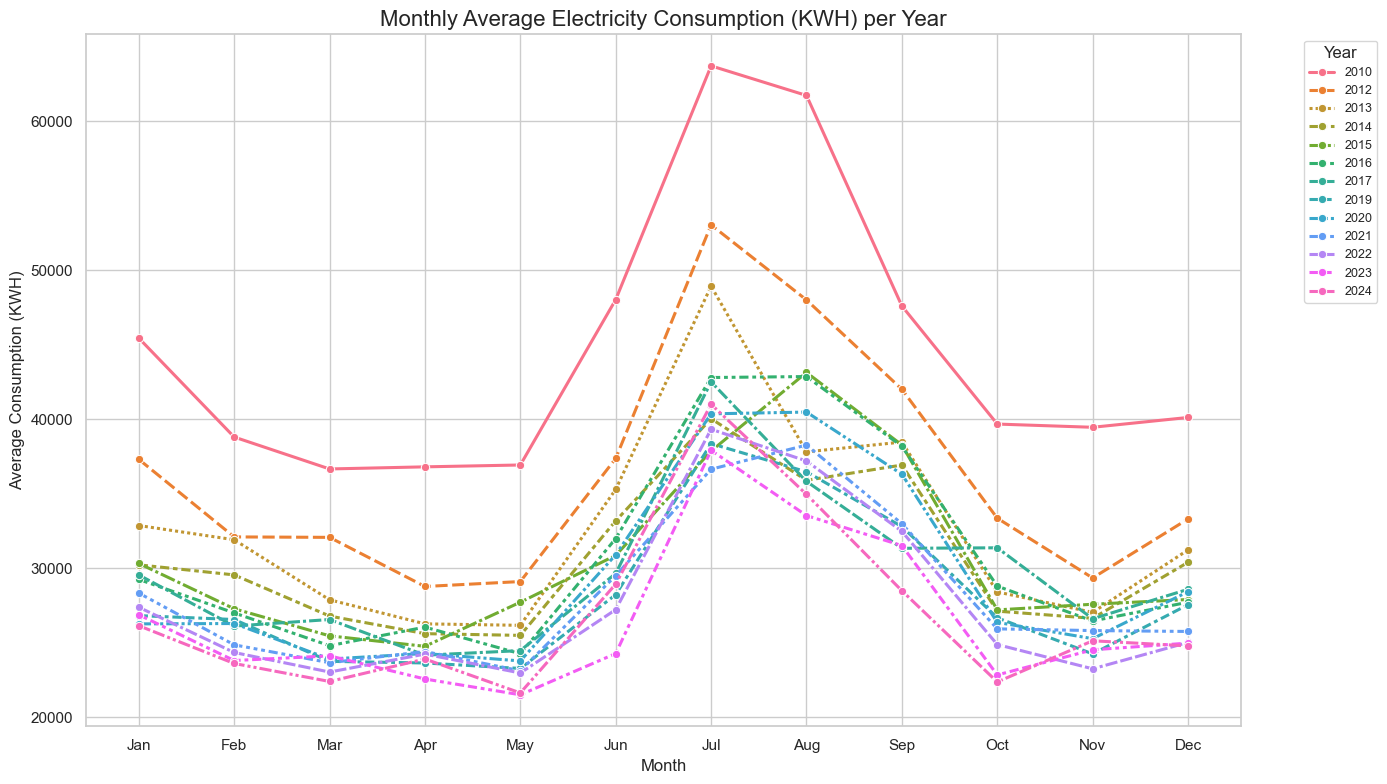

In [41]:
df['Revenue Month'] = pd.to_datetime(df['Revenue Month'], errors = 'coerce')

df_clean = df.dropna(subset=['Revenue Month', 'Consumption (KWH)'])

df_clean['Year'] = df_clean['Revenue Month'].dt.year
df_clean['Month'] = df_clean['Revenue Month'].dt.month

monthly_avg_kwh = df_clean.groupby(['Year', 'Month'])['Consumption (KWH)'].mean().reset_index()

pivot_df = monthly_avg_kwh.pivot(index='Month', columns='Year', values='Consumption (KWH)')

# Plotting
plt.figure(figsize=(14, 8), dpi=100)
sns.lineplot(data=pivot_df, linewidth=2.2, marker='o')
plt.title('Monthly Average Electricity Consumption (KWH) per Year', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Consumption (KWH)', fontsize=12)
plt.xticks(range(1, 13), [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.grid(True)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.tight_layout()
plt.show()





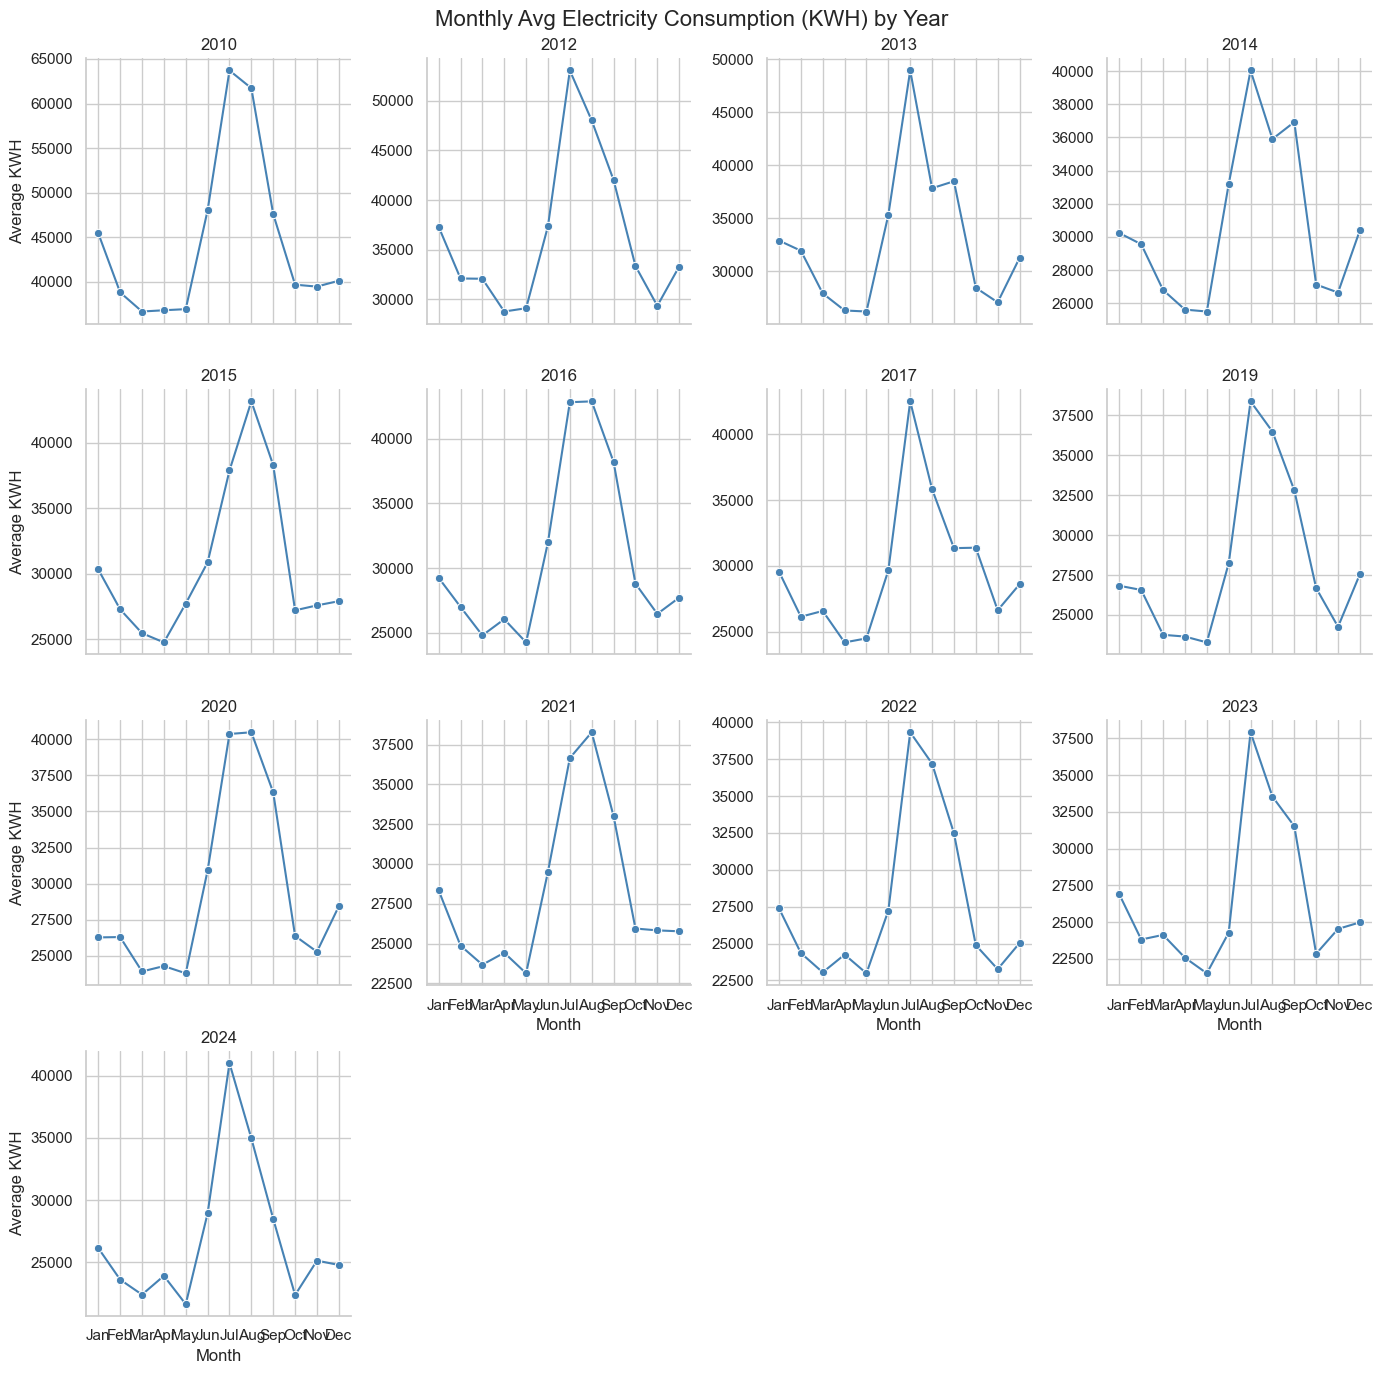

In [42]:
month_labels = [calendar.month_abbr[i] for i in range(1, 13)]

monthly_avg_kwh = df_clean.groupby(['Year', 'Month'])['Consumption (KWH)'].mean().reset_index()

sns.set_theme(style="whitegrid")
g = sns.FacetGrid(monthly_avg_kwh, col="Year", col_wrap=4, height=3.5, sharey=False)
g.map_dataframe(sns.lineplot, x="Month", y="Consumption (KWH)", marker='o', color="steelblue")
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Month", "Average KWH")
g.set(xticks=range(1, 13), xticklabels=month_labels)
plt.subplots_adjust(top=0.92)
g.fig.suptitle("Monthly Avg Electricity Consumption (KWH) by Year", fontsize=16)
plt.tight_layout()
plt.show()